# PLCTestbench

In [ ]:
from plctestbench.settings import *
from plctestbench.plc_testbench import PLCTestbench
from plctestbench.loss_simulator import BinomialPLS, MetronomePLS, GilbertElliotPLS
from plctestbench.plc_algorithm import AdvancedPLC, ZerosPLC, LastPacketPLC, LowCostPLC, BurgPLC, DeepLearningPLC, ExternalPLC
from plctestbench.output_analyser import MSECalculator, MAECalculator, PEAQCalculator, WindowedPEAQCalculator, SpectralEnergyCalculator, PerceptualCalculator, HumanCalculator

from plctestbench.worker import OriginalAudio

testbench_settings = {'root_folder': '/home/marcel/testbench/2023-v2-vignati/input_files',
                      'db_ip': '127.0.0.1',
                      'db_port': 27017,
                      'db_username': 'myUserAdmin',
                      'db_password': 'admin'}

original_audio_tracks = [
    (OriginalAudio, OriginalAudioSettings('a0005-173176-123056-332402.wav')),
    # (OriginalAudio, OriginalAudioSettings('Stereo_test.wav')),
    # (OriginalAudio, OriginalAudioSettings('Mono_80sec.wav')),
    # (OriginalAudio, OriginalAudioSettings('Test_0.2ms.wav'))
]

packet_loss_simulators = [
    # (BinomialPLS, BinomialPLSSettings(
    #     seed = 1, # for comparing results: leave at 1
    #     packet_size = 128,
    #     per = 0.0001
    # )),
    # (MetronomePLS, MetronomePLSSettings(
    #     seed = 1, # for comparing results: leave at 1
    #     packet_size = 128,
    #     period = 100,
    #     duration = 6,
    #     offset = 0
    # )),
    (GilbertElliotPLS, GilbertElliotPLSSettings(
        seed = 1, # for comparing results: leave at 1
        packet_size = 128,
        p = 0.001,
        r = 0.05,
        h = 0.5,
        k = 0.99999900
    ))
]

crossfade_settings = (
    ManualCrossfadeSettings(
        length = 1, # duration: int in ms
        function = 'power', # string 'power' or 'sinusoidal' 
        exponent = 1.0, # float 
        type = 'power' # equal power or amplitude of sum of original and reconstructed signal: string 'power' or 'amplitude'
        )
    # LinearCrossfadeSettings(length=1) # function = 'power', exponent = 1.0, type = None
    # QuadraticCrossfadeSettings(length=1) # function = 'power', exponent = 2.0, type = None
    # CubicCrossfadeSettings(length=1) # function = 'power', exponent = 3.0, type = None
    # SinusoidalCrossfadeSettings(length=1) # function = 'sinusoidal', type = None
    )

multiband_crossfade_settings = [
    QuadraticCrossfadeSettings(length=50), # for 0 till first crossfade_frequency Hz
    QuadraticCrossfadeSettings(length=5),  # for first crossfade_frequency till next crossfade_frequency
    QuadraticCrossfadeSettings(length=1)   # for last crossfade_frequency till 20000 Hz
    ]

plc_algorithms = [
    # (ZerosPLC, ZerosPLCSettings(
    #     crossfade = None, # settings for right of lost samples: (multiband_)crossfade_settings or None
    #     fade_in = None, # settings for left of lost samples: (multiband_)crossfade_settings or None
    #     crossfade_frequencies = None, # 
    #     crossover_order = None
    # )),
    # (LastPacketPLC, LastPacketPLCSettings(
    #     crossfade = multiband_crossfade_settings, # settings for right of lost samples: (multiband_)crossfade_settings or None
    #     fade_in = None, # settings for left of lost samples: (multiband_)crossfade_settings or None
    #     crossfade_frequencies = [200, 2000],
    #     crossover_order = 4, # Slope of the filters of the frequency bands: int, 2 (12 dB/Oktave), 4 (24 dB/Oktave), 8 (48 dB/Oktave)
    #     mirror_x = False, # mirroring the last samples on the x-axis (time-axis): 'Boolean
    #     mirror_y = False, # # mirroring the last samples on the y-axis (amplitude-axis): 'Boolean
    #     clip_strategy = ClipStrategy.subtract # determines how the signal is handled if clipping occurs during mirroring ClipStrategy.subtract or ClipStrategy.flip
    # )),
    # (LowCostPLC, LowCostPLCSettings(
    #     crossfade = None, # settings for right of lost samples: (multiband_)crossfade_settings or None
    #     fade_in = None, # settings for left of lost samples: (multiband_)crossfade_settings or None
    #     crossfade_frequencies = None,
    #     crossover_order = None,
    #     max_frequency = 4800,
    #     f_min = 80,
    #     beta = 1,
    #     n_m = 2,
    #     fade_in_length = 10,
    #     fade_out_length =  0.5,
    #     extraction_length = 2
    # )),
    (BurgPLC, BurgPLCSettings(
        crossfade = None, # settings for right of lost samples: (multiband_)crossfade_settings or None
        fade_in = None, # settings for left of lost samples: (multiband_)crossfade_settings or None
        crossover_order = None,
        context_length = 100,
        order = 1
    )),
    # (AdvancedPLC, AdvancedPLCSettings(
    #     settings = {'linked':[ZerosPLCSettings(),   # for 0 - 200 Hz
    #                        LastPacketPLCSettings(), # for 200 - 200 Hz
    #                        BurgPLCSettings()]},     # for 2000 - 20000 Hz
    #     frequencies = {'linked': [200, 2000]},      # boundaries
    #     channel_link=True
    # )),
    # (AdvancedPLC, AdvancedPLCSettings(
    #     settings = {'left':[ZerosPLCSettings(),       # für 0 - 200 Hz
    #                        LastPacketPLCSettings(),   # für 200 - 200 Hz
    #                        BurgPLCSettings()],        # für 2000 - 20000 Hz
    #                 'right':[LastPacketPLCSettings(), # für 0 - 1000 Hz
    #                         BurgPLCSettings()]},      # für 1000 - 20000 Hz
    #     frequencies = {'left': [200, 2000], 'right': [1000]},
    #     stereo_image_processing = StereoImageType.dual_mono,
    #     channel_link=False
    # )),
    # (AdvancedPLC, AdvancedPLCSettings(
    #     settings = {'mid':[ZerosPLCSettings(),       # for 0 - 200 Hz
    #                        LastPacketPLCSettings(),  # for 200 - 200 Hz
    #                        BurgPLCSettings()],       # for 2000 - 20000 Hz
    #                 'side':[LastPacketPLCSettings(), # for 0 - 1000 Hz
    #                         BurgPLCSettings()]},     # for 1000 - 20000 Hz
    #     frequencies = {'mid': [200, 2000], 'side': [1000]},
    #     stereo_image_processing = StereoImageType.mid_side,
    #     channel_link=False
    # )),
    # (DeepLearningPLC, DeepLearningPLCSettings(
    #     crossfade = None, # settings for right of lost samples: (multiband_)crossfade_settings or None
    #     fade_in = None, # settings for left of lost samples: (multiband_)crossfade_settings or None
    #     crossfade_frequencies = None,
    #     crossover_order = None,
    #     model_path = "dl_models/model_bs256_100epochs_0.01_1e-3_1e-7",
    #     fs_dl = 16000,
    #     context_length = 8270,
    #     hop_size = 15,
    #     window_length = 160*3,
    #     lower_edge_hertz = 40.0,
    #     upper_edge_hertz = 7600.0,
    #     num_mel_bins = 100
    # ))
]

metrics = [
    # (MSECalculator, MSECalculatorSettings(
    #     N = 1024, # window size: int
    #     hop = None, # hop size of the audio files: int or None 
    #     amp_scale = 1.0 # scale factor for amplitude of the audio files: float
    # )),
    # (MAECalculator, MAECalculatorSettings(
    #     N = 1024, # window size: int
    #     hop = None, # hop size of the audio files: int or None 
    #     amp_scale = 1.0 # scale factor for amplitude of the audio files: float
    # )),
    # (PEAQCalculator, PEAQCalculatorSettings(
    #     peaq_mode = PEAQMode.basic # basic mode 'PEAQMode.basic' or advanced mode 'PEAQMode.basic'
    # )),
    # (WindowedPEAQCalculator, WindowedPEAQCalculatorSettings(
    #      # Funktioniert noch nicht
    #      peaq_mode = PEAQMode.basic, # basic mode 'PEAQMode.basic' or advanced mode 'PEAQMode.basic'
    #      intorno_length = 300 # window length in ms: int
    # )),
    # (SpectralEnergyCalculator, SpectralEnergyCalculatorSettings(
    #      # gibt noch keine Plot-Funktion 
    #      N = 1024, # window size: int
    #      hop = None, # hop size of the audio files: int or None 
    #      amp_scale = 1.0 # scale factor for amplitude of the audio files: float
    # )),
    (HumanCalculator, HumanCalculatorSettings(  
        stimulus_length = 3000, # length of extracted stimuli from audio file: int in ms
        single_loss_per_stimulus = False, # only one loss per stimuli: Boolean
        stimuli_per_page = 3, # number of stimuli per page: int
        pages = 1, # number of testpages: int
        iterations = 1, # repetitions of the stimuli test: int
        choose_seed = 1, # for comparing results: leave at 1
        reference = '../reference_anchor/a0005-173176-123056-332402.wav', # path to reference audio file relative to webmushra (high quality audio): string
        anchor = '../reference_anchor/a0005-173176-123056-332402.wav' # path to anchor audio file relative to webmushra (bad quality audio): string
    )),
    # (PerceptualCalculator, PerceptualCalculatorSettings( 
    #     intorno_length = 3000, # number of extracted samples per : int
    #     linear_mag = False, # magnitudes linear or logarithmic: boolean
    #     transform_type = 'dcgc', # Constant-Q Transformation 'cqt' or Dynamic Compressive Gammachirp 'dcgc' :string
    #     min_frequency = 20, # minimum frequency for spectrum analysis: float
    #     max_frequency = 20000, # maximum frequency for spectrum analysis: float
    #     bins_per_octave = 48, # number of frequency bins per octave: int
    #     n_bins = 100, # total number of frequency bins for Dynamic Compressive Gammachirp: int
    #     minimum_window = 2048, # minimum number of window size for Constant-Q Transformation (samples): int
    #     masking = False, # masking effects taken into account for Constant-Q Transformation (plc-testbench/masking_data/S1dataset_rawdata.npz): boolean
    #     masking_offset = 0, # masking offset for masking effects if masking = True: int
    #     db_weighting = '', # None, A- or C-dB-Weighting taken into account for logarithmic magnitudes: '', 'A', or 'C'
    #     metric = '' # weighted sum of spectral data: '' or 'weighted_sum'
    # )),
]

testbench = PLCTestbench(
        original_audio_tracks,
        packet_loss_simulators,
        plc_algorithms,
        metrics,
        testbench_settings
        )

[   INFO   ] MusicExtractorSVM: no classifier models were configured by default
2025-06-04 16:56:31.254882: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-06-04 16:56:31.382746: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-06-04 16:56:31.387386: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2025-06-04 16:56:31.387416: I te

User already exists in the database.
Run already exists in the database.


In [2]:
testbench.run()

Audio Tracks:   0%|          | 0/1 [00:00<?, ?it/s]

OriginalAudio:   0%|          | 0/10 [00:00<?, ?it/s]

GilbertElliotPLS_s1:   0%|          | 0/10 [00:00<?, ?it/s]

BurgPLC:   0%|          | 0/10 [00:00<?, ?it/s]

HumanCalculator:   0%|          | 0/4 [00:00<?, ?it/s]

testbench.run finished!


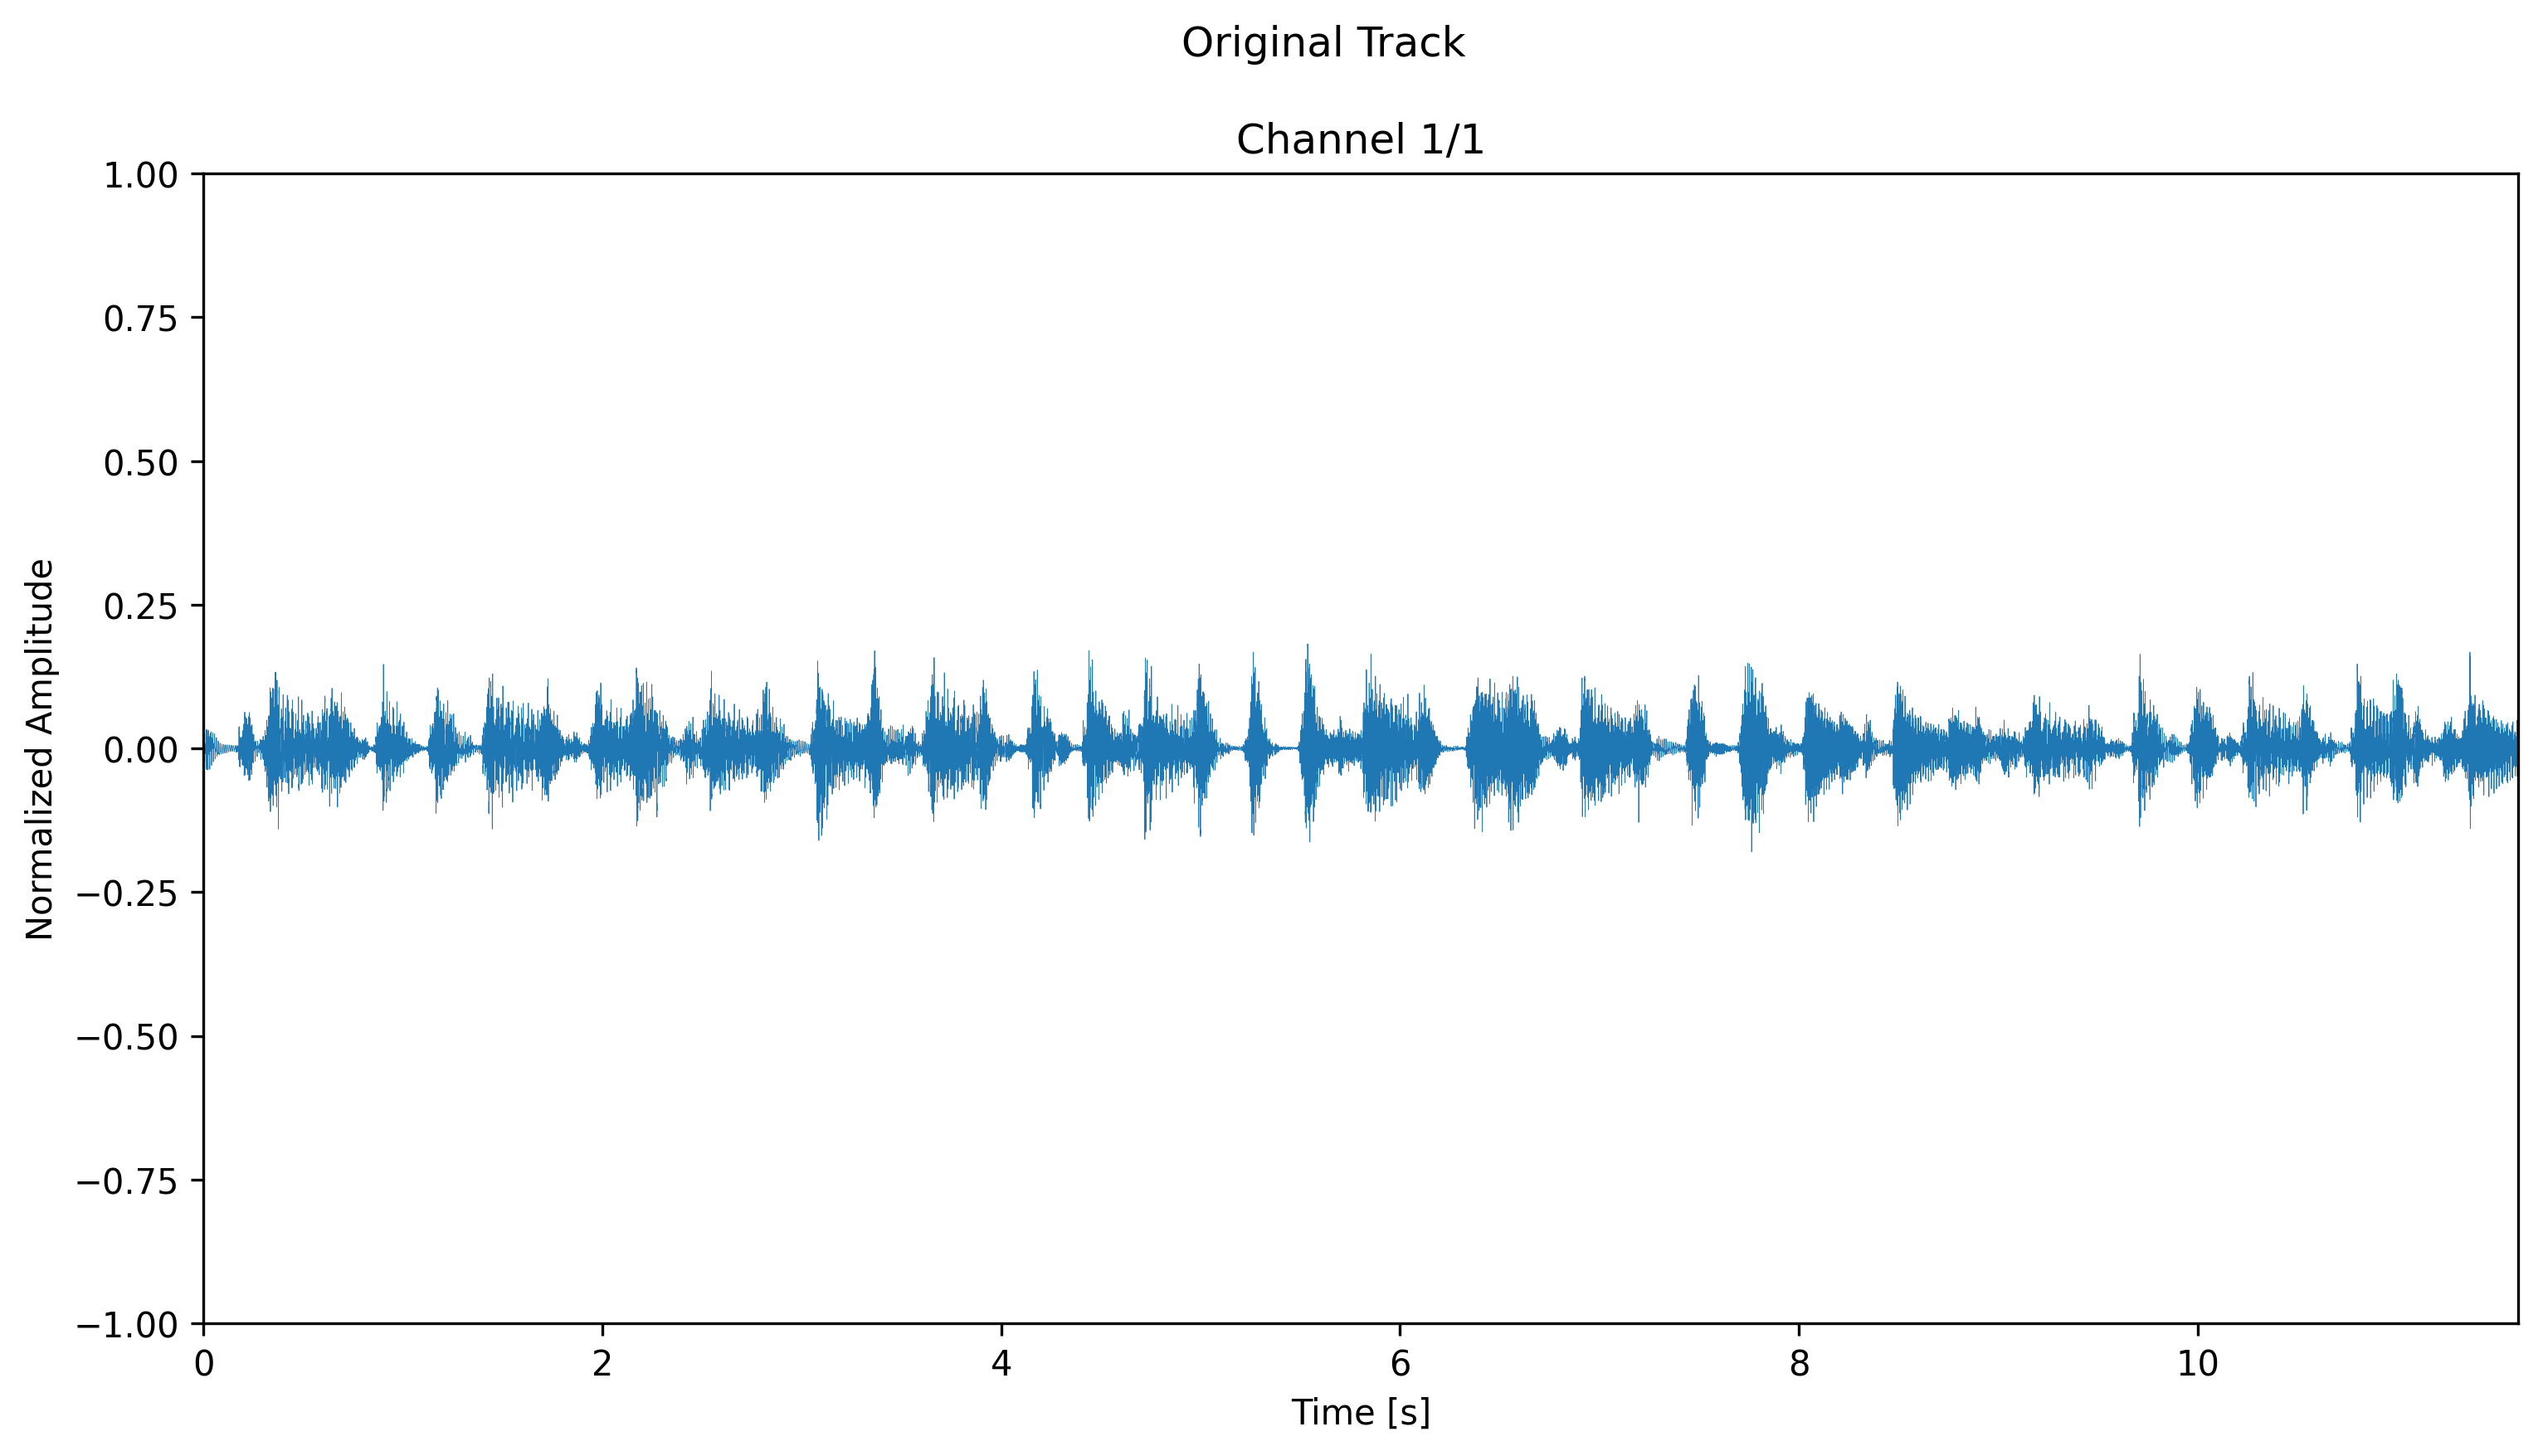

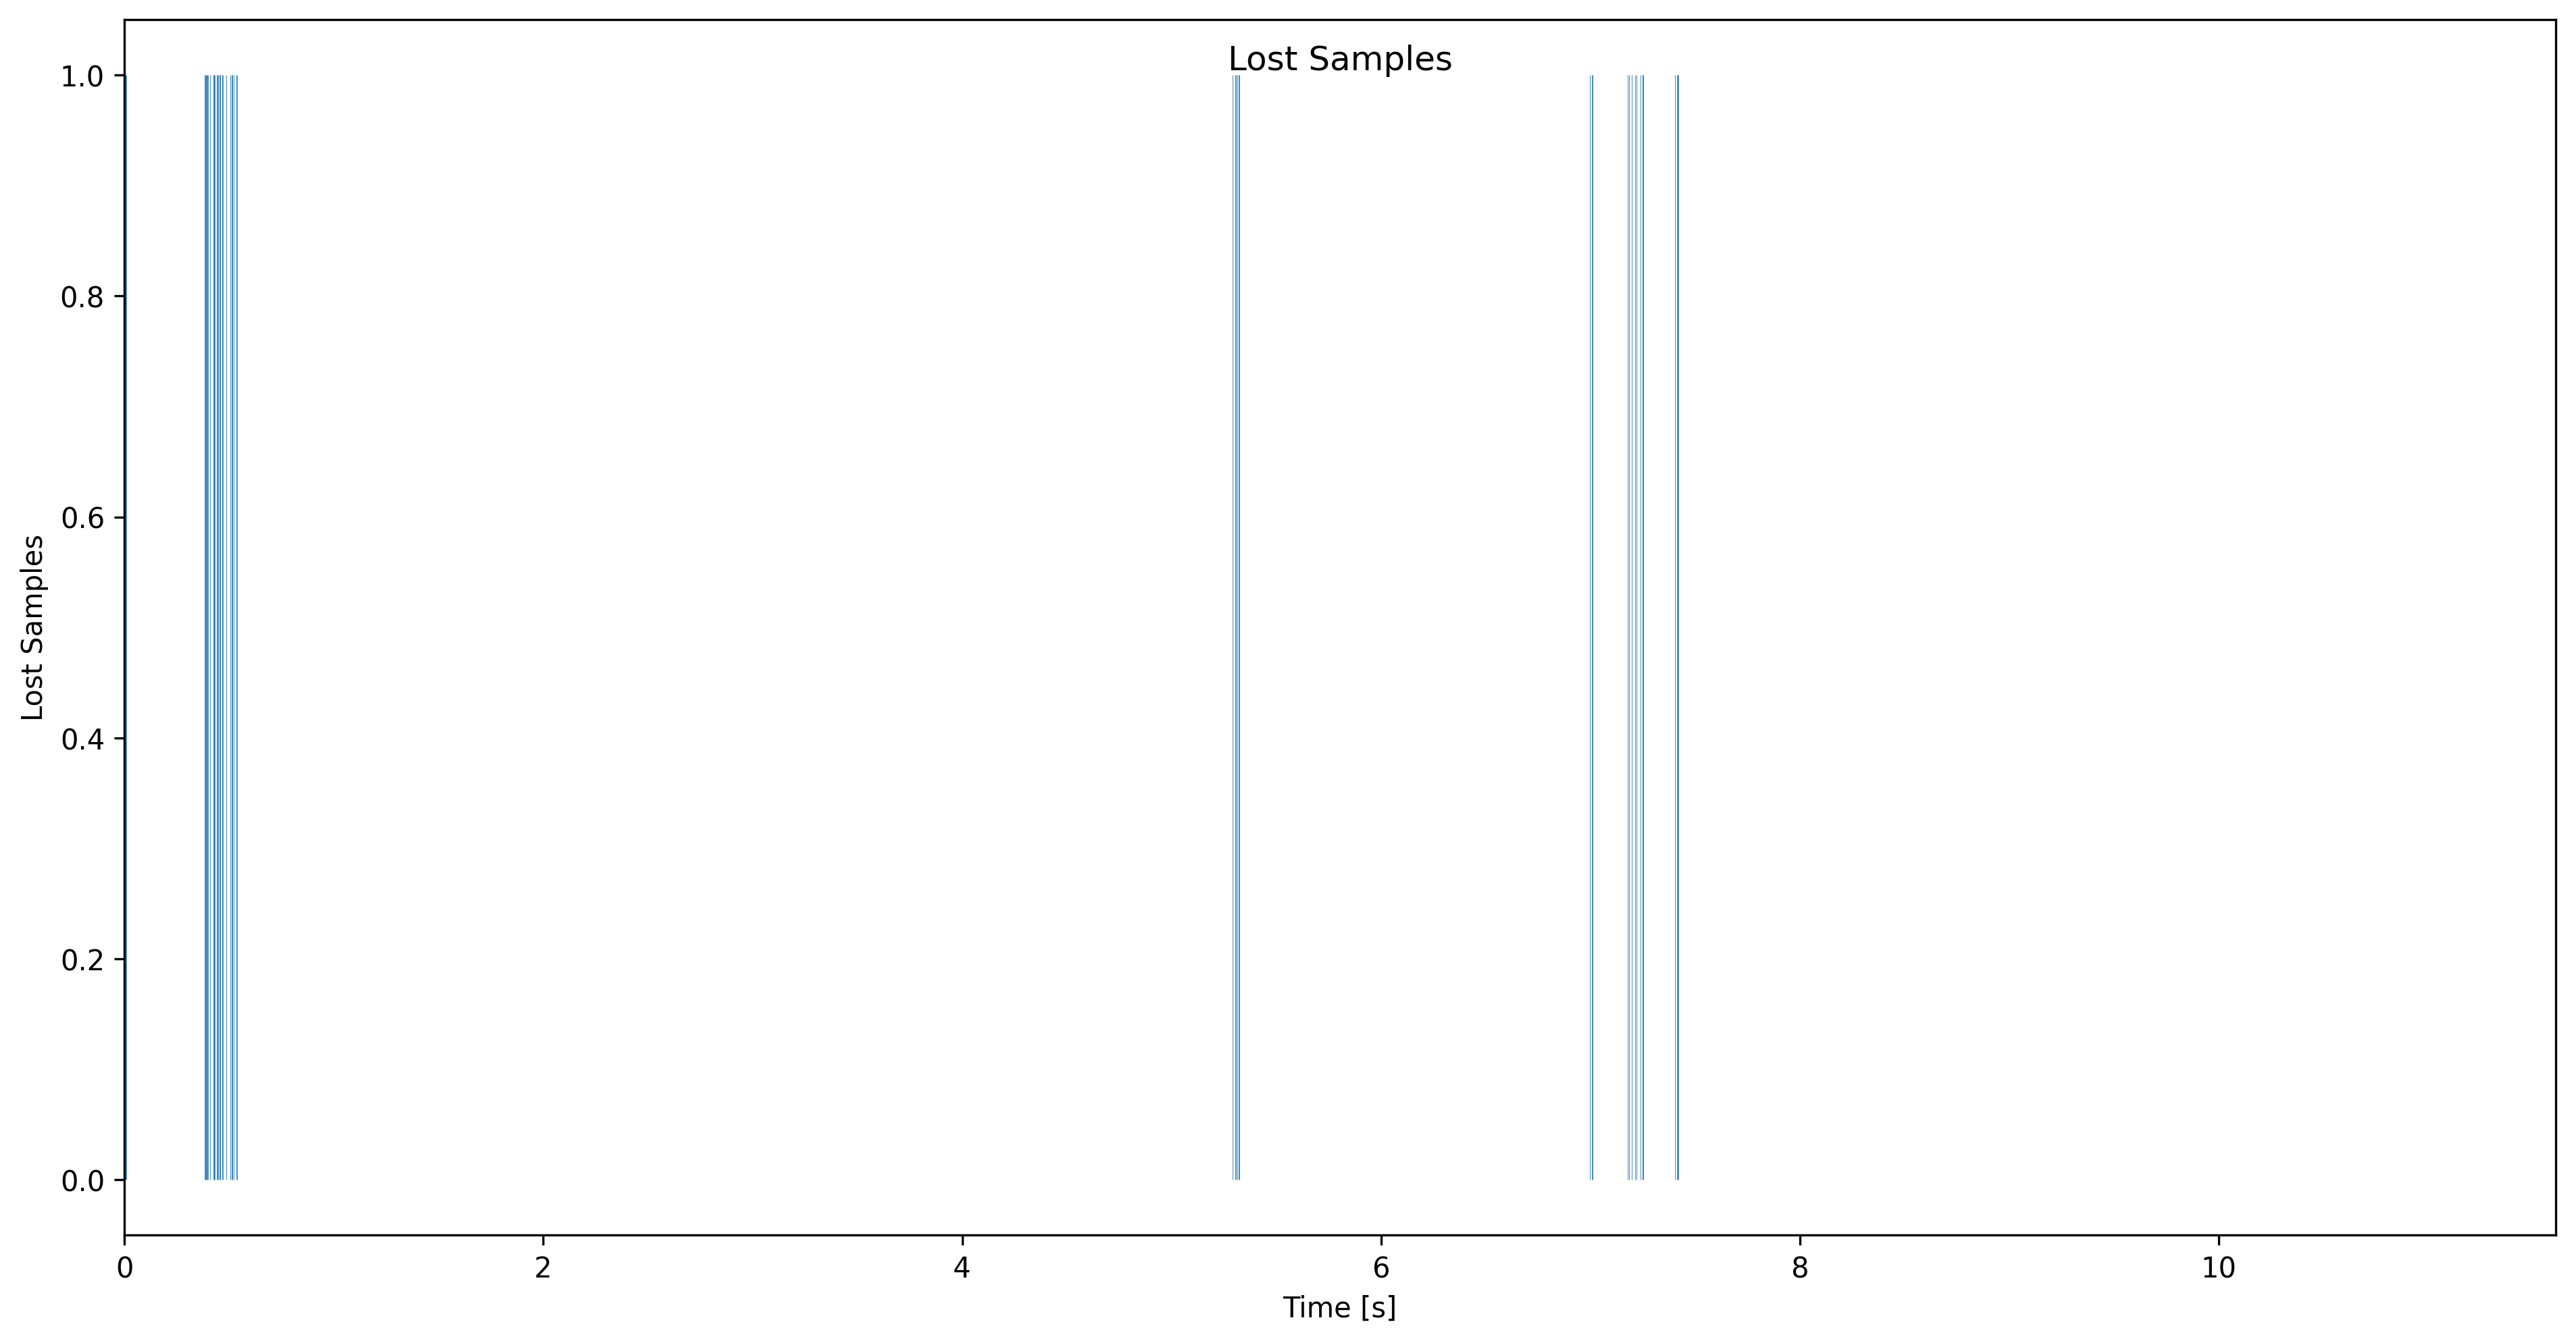

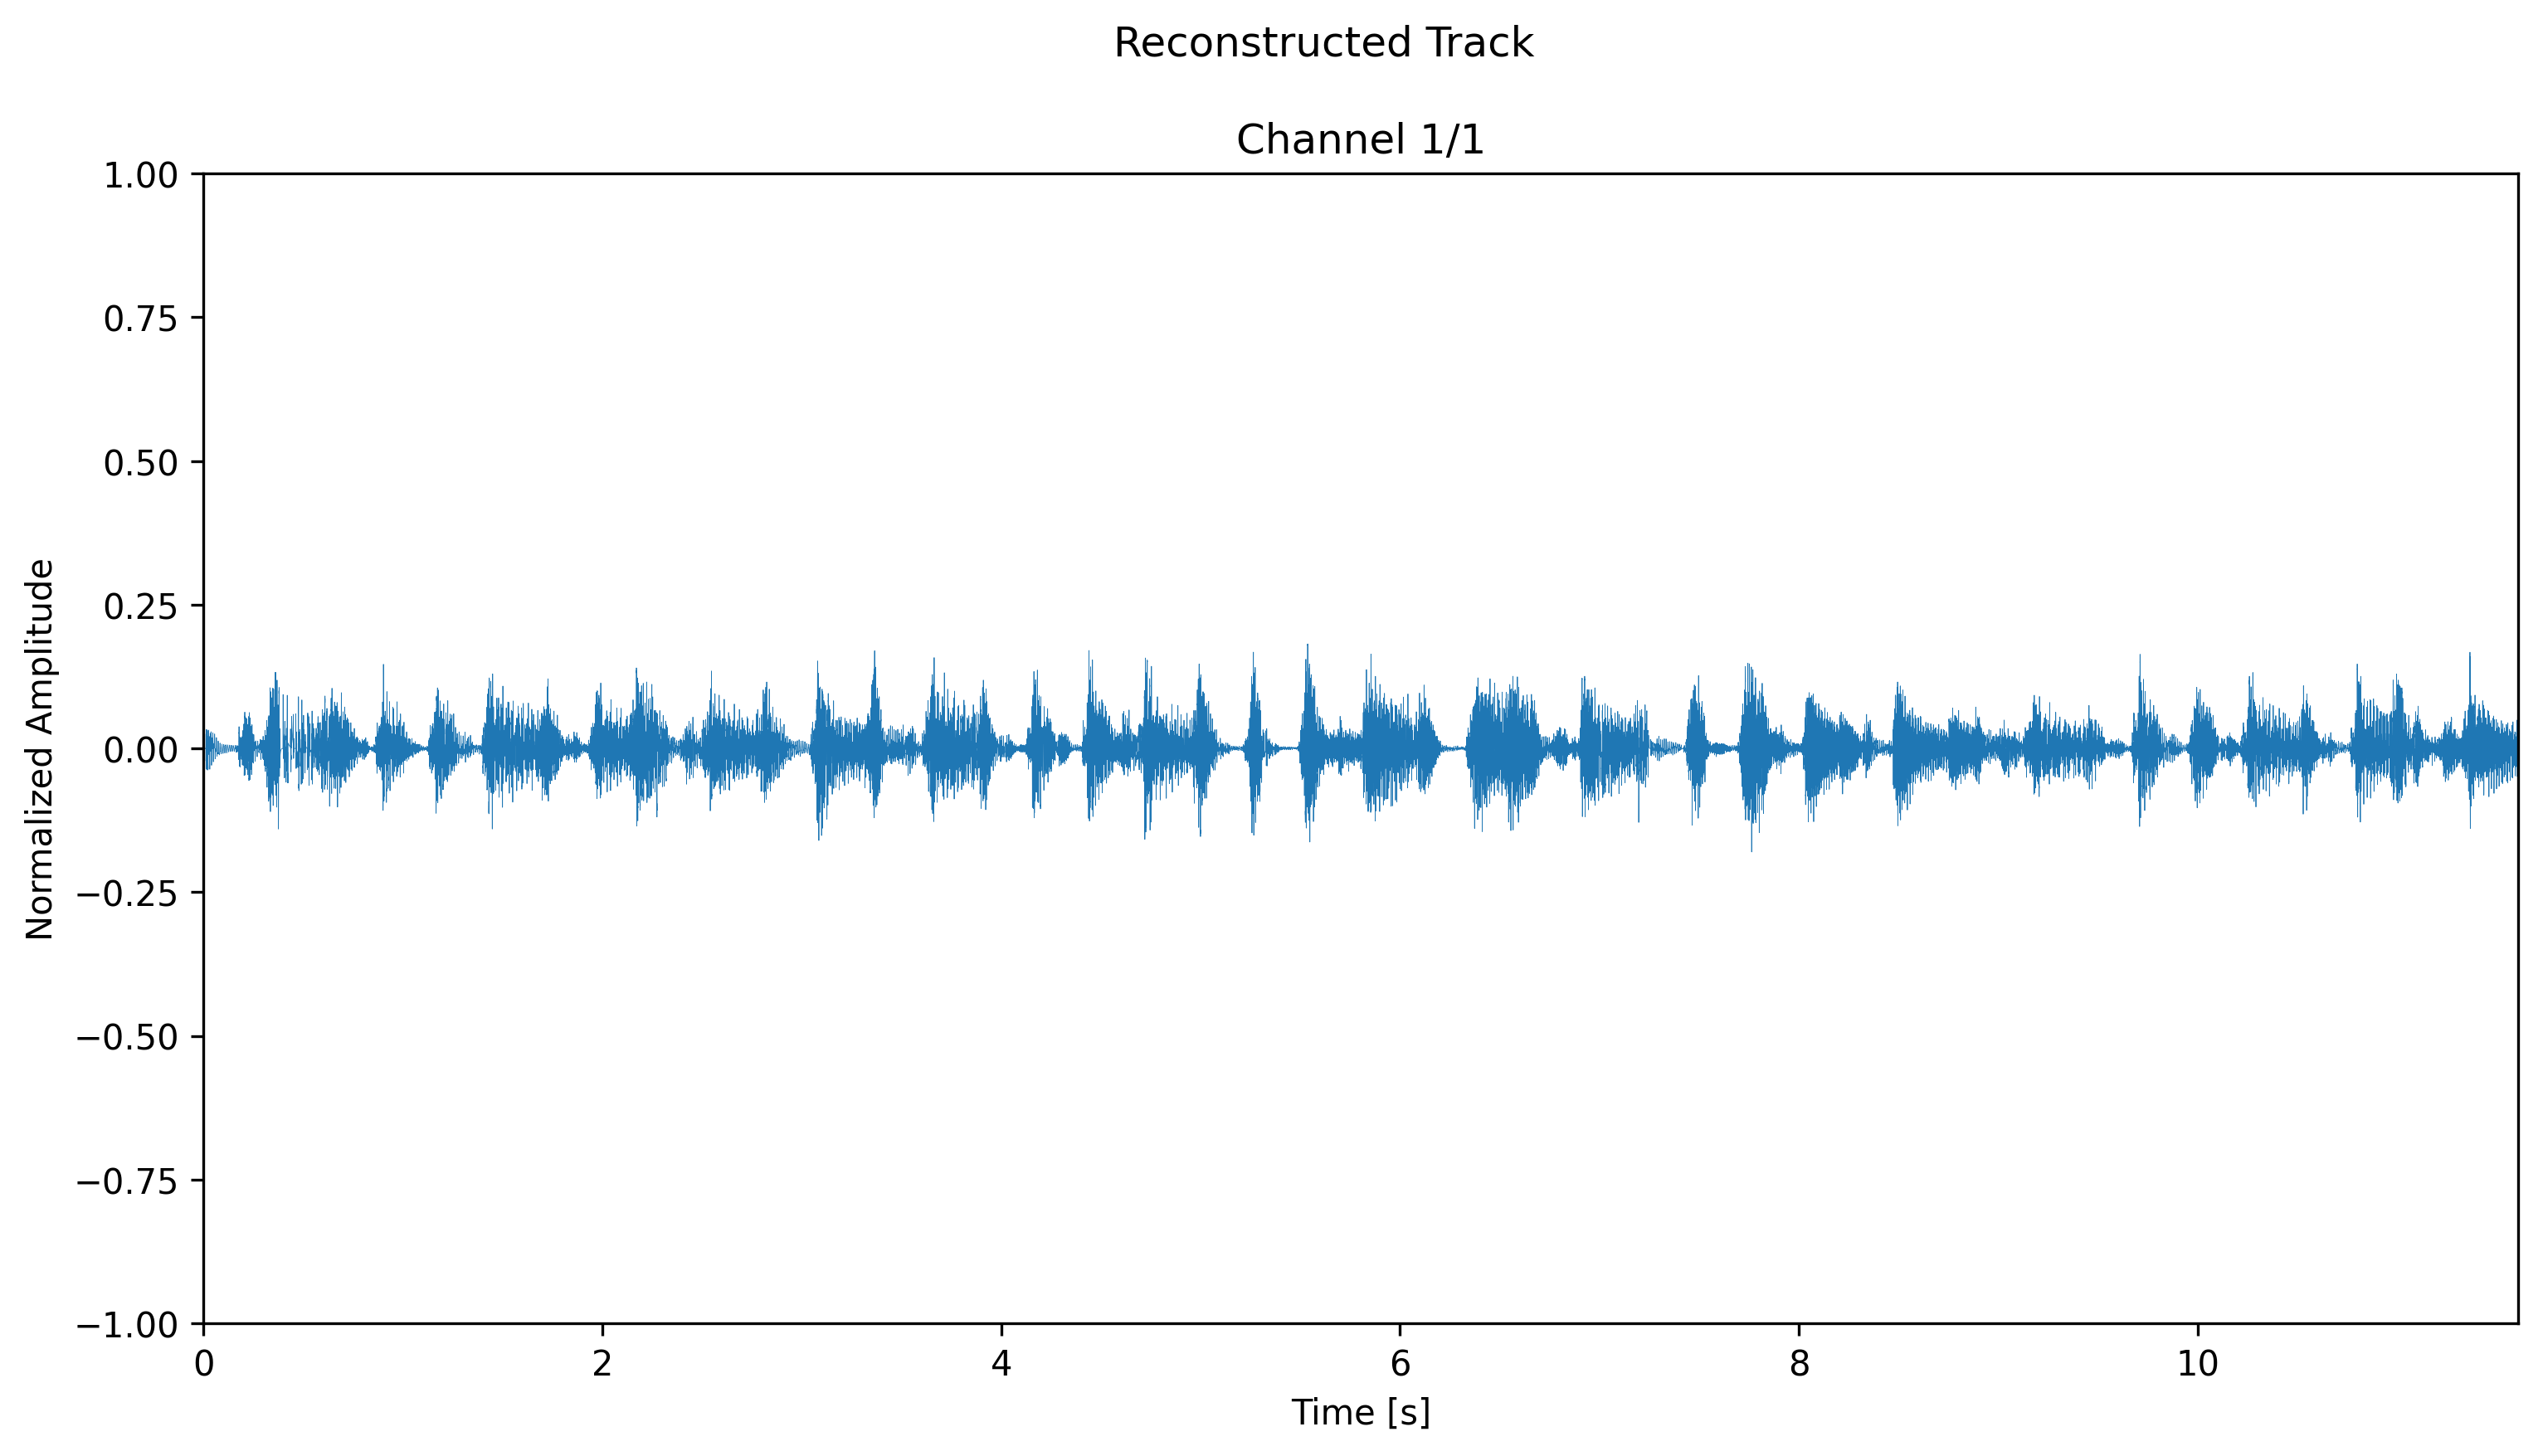

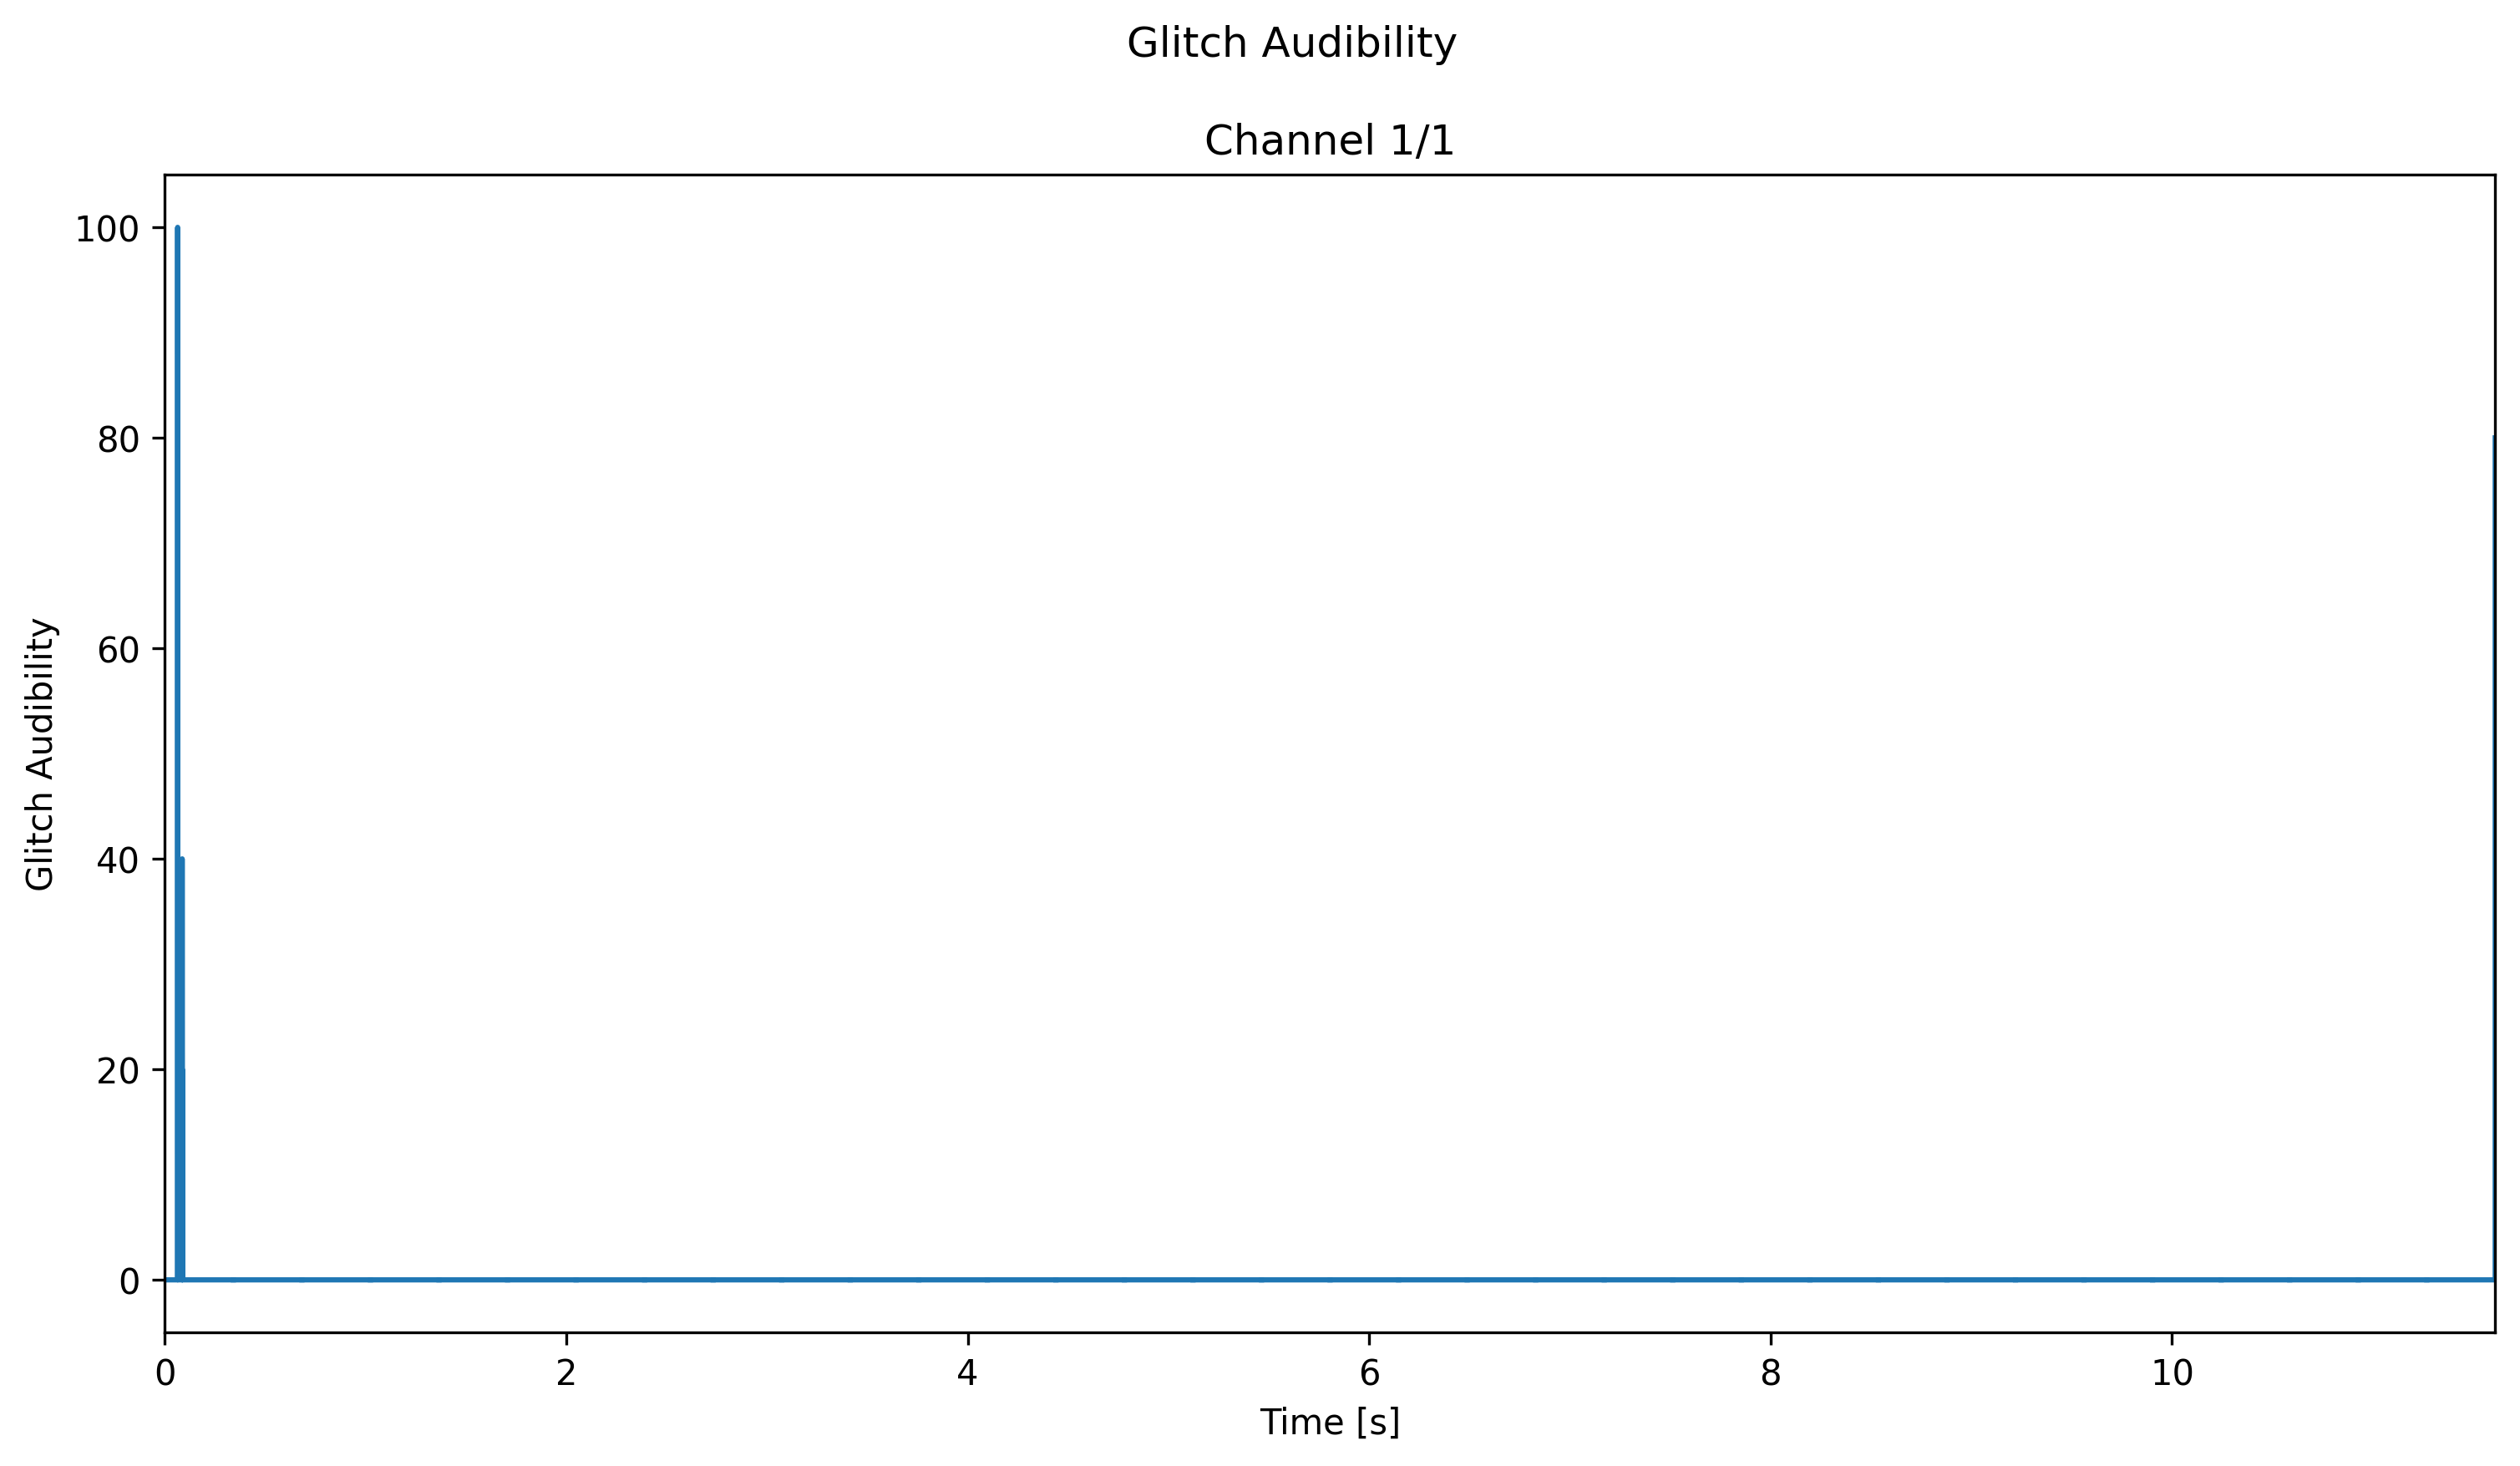

testbench.plot finished!


In [3]:
testbench.plot(
    show = True, # shows plots here
    to_file = True, # plots will be saved as file: bolean
    original_tracks = True, # plots audio track: bolean
    lost_samples_masks = True, # plots a diagram of the lost samples: bolean
    reconstructed_tracks = True, # plots audio signals after reconstruction: bolean
    output_analyses = True, # plots the results of the metrics: bolean
    group = False, # combined setting for the 4 parameters before: bolean
    peaq_summary = False, # plots the peaq results
    )